In [1]:
# Data analysis library numpy and pandas
import pandas as pd
import numpy as np

# Data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.patches as mpatches

import mimetypes
import urllib
import os

from google.colab import drive	
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/MyDrive/Paper-Viz-master/Example_Data/Box/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Paper-Viz-master/Images/'

In [4]:
class Box_plot: 
  # read data
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]
    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data

  # check the available file name
  # if the input file name already existed then rename to file_1, file_2 
  def get_available_name(self,filename):
    n=[1]
    def check_meta(file_name):
        file_name_new=file_name
        if file_name in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
            file_name_new=file_name+'_'+str(n[0])
            n[0]+=1
        if file_name_new in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
            file_name_new=check_meta(file_name)
        return file_name_new
    available_name=check_meta(filename)
    return available_name

  # file: file name of your data source
  # x_col_name: ['x_column_name_a','x_column_name_b'...]
  # paper_type : 'single' or 'double'
  def box(self, file, x_col_name, paper_type, **kwargs):
    # Configuration of the box plot
    # plotwidth: width of the plot
    # plotheight: height of the plot
    # backgrid: backgrid of the plot
    # isframe: frame of the plot
    # my_font: the typeface of x, y labels
    # gridlinewidth: grid line width
    # title: True or False as options. If it is True, add title for the plot
    # title_pad: if the title is True, modify pad size of title
    # title_size: if the title is True, modify size of title
    # title_loc: if the title is True, modify location of title
    # x_label: the content of x label
    # y_label: the content of y label
    # palette: color palette of box plot
    # widths: each box width
    # notch: True or false, if true, add notch to each box
    # vert: True or False, If True , makes the boxes vertical. If False, everything is drawn horizontally
    # showfliers: True or False, if true, show the outliers beyond the caps
    # showcaps: True or False, if true, show the caps on the ends of whiskers
    # patch_artist: True or False, if true, boxes and drawn with Patch artists
    # box_linestyle: the style of box outline
    # box_linewidth: the line width of box outlines
    # medianline_color: the color or median line color
    # showmeans: True or False, if true, show the median line
    # meanline_color: the color or mean line color
    # meanline_style: the line style of mean line
    # markers_shape: the shape of outliers
    # actual_value: True or False, if true show the actual value of mean or meadian
    # save_image: True or False as options. If it is True, save chart
    # savefig_bbox_inches: Bounding box in inches
    # file_name: the file name in saving image

    single_column_conf={ 'plotwidth':8,#weight
                      'plotheight':6, #height
                      'my_font':'DejaVu Sans',
                      'labeltext_size':25,
                      'labelpad':10,
                      'backgrid':True,
                      'isframe':True,
                      'gridlinewidth':0.5,
                      'title':False,
                      'title_pad':10,
                      'title_size':20,
                      'tick_size':15,
                      'title_loc':'center',
                      'x_label':None,
                      'y_label':None,
                      'palette':sns.color_palette("hls", 10),
                      'widths':0.5,
                      'notch':False,
                      'vert':True,
                      'showfliers':True,
                      'showcaps':True,
                      'patch_artist':True,
                      'box_linestyle': '-', 
                      'box_linewidth': 1,
                      'medianline_color':'Black',
                      'showmeans':False,
                      'meanline_color':'White',
                      'meanline_style':'--',
                      'markers_shape':['o','v','D','X','P','2','p','x','d','4','<','*'], 
                      'actual_value':False,
                      'save_image':False,
                      'savefig_bbox_inches':'tight',
                      'file_name':'box_plot',
                      }
    double_column_conf={ 'plotwidth':8,#weight
                      'plotheight':6, #height
                      'my_font':'DejaVu Sans',
                      'labeltext_size':25,
                      'labelpad':10,
                      'backgrid':True,
                      'isframe':True,
                      'gridlinewidth':0.5,
                      'title':False,
                      'title_pad':10,
                      'title_size':20,
                      'tick_size':18,
                      'title_loc':'center',
                      'x_label':None,
                      'y_label':None,
                      'palette':sns.color_palette("hls", 10),
                      'widths':0.5,
                      'notch':False,
                      'vert':True,
                      'showfliers':True,
                      'showcaps':True,
                      'patch_artist':True,
                      'box_linestyle': '-', 
                      'box_linewidth': 1,
                      'medianline_color':'Black',
                      'showmeans':False,
                      'meanline_color':'White',
                      'meanline_style':'--',
                      'markers_shape':['o','v','D','X','P','2','p','x','d','4','<','*'], 
                      'actual_value':False,
                      'save_image':False,
                      'savefig_bbox_inches':'tight',
                      'file_name':'box_plot',
                      }
    # choose the configuration of plot
    if paper_type == 'single':
      conf = single_column_conf
    elif paper_type == 'double':
      conf = double_column_conf  
    conf.update(kwargs)
    # create figure and set figure size  
    fig, ax_left = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))   
    
    #read data
    try:
      data = self.read_file(file)
    except Exception:
      print('Sorry, this file does not exist, please check the file name') 
    # draw back grid of whole plot
    if conf['backgrid'] == True:
      ax_left.grid(linestyle="--", linewidth=conf['gridlinewidth'], color='gray', alpha=0.5)
    
    # x, y axis label setting
    # fontsize: x, y title size
    ax_left.set_xlabel(conf['x_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])
    ax_left.set_ylabel(conf['y_label'], fontproperties=conf['my_font'], fontsize=conf['labeltext_size'], labelpad=conf['labelpad'])

    #plot     
    for i in range(len(x_col_name)):
      # if the showmeans is false, draw the box plot only includes details of medians
      if conf['showmeans'] == False:
        box=ax_left.boxplot(data[x_col_name[i]],positions=[i],labels=[x_col_name[i]],patch_artist=conf['patch_artist'],vert=conf['vert'],widths=conf['widths'],
                        boxprops={'facecolor':conf['palette'][i],'color':conf['palette'][i],'linestyle': conf['box_linestyle'], 'linewidth': conf['box_linewidth']},
                        medianprops={'color':conf['medianline_color']},
                        flierprops=dict(marker=conf['markers_shape'][i],markeredgecolor=conf['palette'][i]),
                        notch=conf['notch']
                        )
        # show the actual value of medians in box plot
        if conf['actual_value']==True:
          ax_left.text(x=box['medians'][0].get_data(orig=True)[0][1]+0.01,y=box['medians'][0].get_data(orig=True)[1][0],s='medians='+str(box['medians'][0].get_data(orig=True)[1][0]),fontsize=12)

        
      else:
        box=ax_left.boxplot(data[x_col_name[i]],positions=[i],labels=[x_col_name[i]],patch_artist=conf['patch_artist'],vert=conf['vert'],widths=conf['widths'],
                      boxprops={'facecolor':conf['palette'][i],'color':conf['palette'][i],'linestyle': conf['box_linestyle'], 'linewidth': conf['box_linewidth']},
                      medianprops={'color':conf['medianline_color'],'linewidth': conf['box_linewidth']},
                      showmeans=True,meanline=True,meanprops={'color':conf['meanline_color'],'linestyle': conf['meanline_style'],'linewidth': conf['box_linewidth']},
                      flierprops=dict(marker=conf['markers_shape'][i],markeredgecolor=conf['palette'][i]), 
                      notch=conf['notch']
                      )
        if conf['actual_value']==True:
          # check the value of medians and means the actual values shows above the line if it has bigger value, else, show detail below the line
          if box['medians'][0].get_data(orig=True)[1][0]>box['means'][0].get_data(orig=True)[1][0]:
            ax_left.text(x=box['medians'][0].get_data(orig=True)[0][0],y=box['medians'][0].get_data(orig=True)[1][0]*1.1,s='medians='+str(round(box['medians'][0].get_data(orig=True)[1][0],3)),fontsize=12)
            ax_left.text(x=box['means'][0].get_data(orig=True)[0][0],y=box['means'][0].get_data(orig=True)[1][0]*0.8,s='means='+str(round(box['means'][0].get_data(orig=True)[1][0],3)),fontsize=12)
          else:
            ax_left.text(x=box['medians'][0].get_data(orig=True)[0][0],y=box['medians'][0].get_data(orig=True)[1][0]*0.8,s='medians='+str(round(box['medians'][0].get_data(orig=True)[1][0],3)),fontsize=12)
            ax_left.text(x=box['means'][0].get_data(orig=True)[0][0],y=box['means'][0].get_data(orig=True)[1][0]*1.1,s='means='+str(round(box['means'][0].get_data(orig=True)[1][0],3)),fontsize=12)
    
   
    # if False, top and right borders removing    
    if conf['isframe'] == False:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    # set x, y tick's direction, default:out, can be set to in,out,inout
    for tick in ax_left.xaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    for tick in ax_left.yaxis.get_major_ticks():
      tick.label.set_fontsize(conf['tick_size'])
    #title setting
    if conf['title'] == False:
      pass
    else:
      ax_left.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad'])
    #save
    if conf['save_image'] == True:
      file_name=conf['file_name']
      file_newname = self.get_available_name(file_name)
      plt.savefig(path_img+file_newname, bbox_inches=conf['savefig_bbox_inches'])  


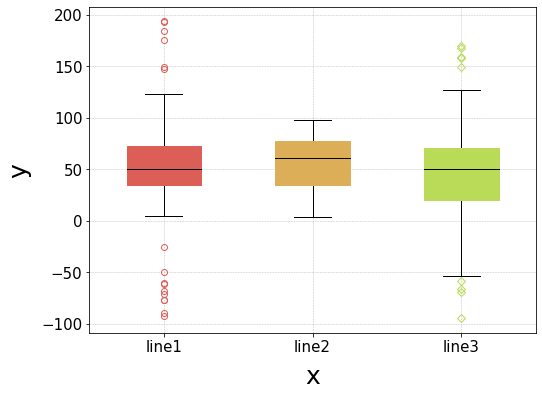

In [5]:
# Multi-item box plot
abox=Box_plot()
abox.box('3.xlsx',x_col_name=['line1','line2','line3'],x_label='x',y_label='y',paper_type='single',showmeans=False,actual_value=False)

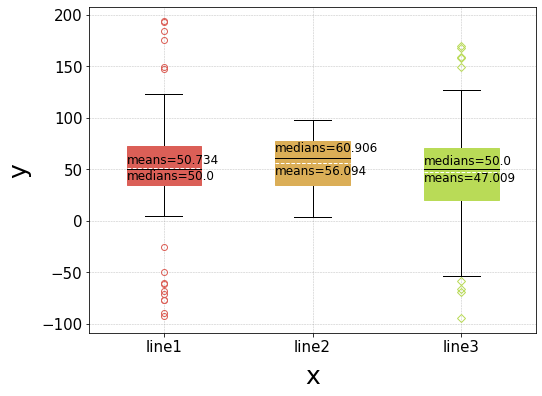

In [6]:
# Multi-item box plot with actual mean and median values
abox=Box_plot()
abox.box('3.xlsx',x_col_name=['line1','line2','line3'],x_label='x',y_label='y',paper_type='single',showmeans=True,actual_value=True)